### Chi-Square Test:-

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between two variables.

In [13]:
import scipy.stats as stats

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

C:\Users\Sachin Dev\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
dataset = sns.load_dataset('tips')
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
dataset.shape

(244, 7)

In [5]:
## tale to categorical variables and create a table
dataset_table = pd.crosstab(dataset['sex'],dataset['smoker'])
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [6]:
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [7]:
dataset_table.shape

(2, 2)

In [8]:
dataset_table.values

array([[60, 97],
       [33, 54]], dtype=int64)

In [10]:
### Observed Values
Observed_values = dataset_table.values
print("Observed Values are:-\n",Observed_values)

Observed Values are:-
 [[60 97]
 [33 54]]


In [14]:
### applying chi-square test

val=stats.chi2_contingency(dataset_table)

In [16]:
val

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [17]:
val[0]

0.0

In [18]:
val[2]

1

In [20]:
val[3]

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [26]:
### expected Values
Expected_values = val[3]

In [25]:
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [23]:
dataset_table.iloc[0:2,0]

sex
Male      60
Female    33
Name: Yes, dtype: int64

In [24]:
dataset_table.iloc[0,0:2]

smoker
Yes    60
No     97
Name: Male, dtype: int64

In [27]:
no_of_rows = len(dataset_table.iloc[0:2,0])
no_of_columns = len(dataset_table.iloc[0,0:2])

### degree of freedom
ddof = (no_of_rows - 1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


                                                  Chi-Square Formula

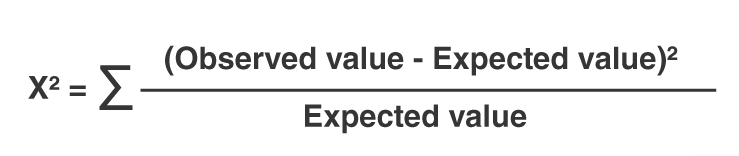

In [55]:
Observed_values

array([[60, 97],
       [33, 54]], dtype=int64)

In [56]:
Expected_values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [45]:

for o,e in zip(Observed_values,Expected_values):
    print(((o-e)**2)/e)

[0.00042693 0.00026294]
[0.00077044 0.00047451]


In [46]:
l = []
for o,e in zip(Observed_values,Expected_values):
    res = ((o-e)**2)/e
    l.append(res)
l

[array([0.00042693, 0.00026294]), array([0.00077044, 0.00047451])]

In [47]:
len(l)

2

In [48]:
arr1 = l[0]
arr1

array([0.00042693, 0.00026294])

In [67]:
arr2 = l[1]
arr2

array([0.00077044, 0.00047451])

In [68]:
res = arr1+arr2

In [69]:
res

array([0.00119737, 0.00073745])

In [70]:
res[0]

0.0011973672091425045

In [71]:
res[1]

0.0007374513274851185

In [72]:
res[0] + res[1]

0.001934818536627623

Simplifying above code

In [57]:
from scipy.stats import chi2
chi_square = [(o-e)**2./e for o,e in zip(Observed_values,Expected_values)]
chi_square

[array([0.00042693, 0.00026294]), array([0.00077044, 0.00047451])]

In [59]:
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_values,Expected_values)])
chi_square_statistic = chi_square[0] + chi_square[1]

In [64]:
chi_square

array([0.00119737, 0.00073745])

In [60]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


A chi-square **critical value** is a threshold for statistical significance for certain hypothesis tests and defines confidence intervals for certain parameters.

In [73]:
### ppf = point percentage function
critical_value = chi2.ppf(q = 1-alpha, df = ddof)
print("Critical Value:-",critical_value)

Critical Value:- 3.841458820694124


In [74]:
## p-value
p_value = 1-chi2.cdf(x = chi_square_statistic,df=ddof)
print("p-value:",p_value)
print("Significance level:",alpha)
print("Degree of Freedom:",ddof)
print("Critical Value:",critical_value)

p-value: 0.964915107315732
Significance level: 0.05
Degree of Freedom: 1
Critical Value: 3.841458820694124


In [75]:
if chi_square_statistic >= critical_value:
    print("Reject H0, There is a relationship between 2 categorical variables")
else:
    print("Retian H0, There is no relationship between 2 categorical variables")
    
if p_value <= alpha:
    print("Reject H0, There is a realtionship between 2 categorical variables")
else:
    print("Retain H0, There is no relationship between 2 categorical variables")

Retian H0, There is no relationship between 2 categorical variables
Retain H0, There is no relationship between 2 categorical variables


### T-Test

A T-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

T-Test has 2types:-<br>
1:- One Sampled T-test<br>
2:- Two Sampled T-test<br>

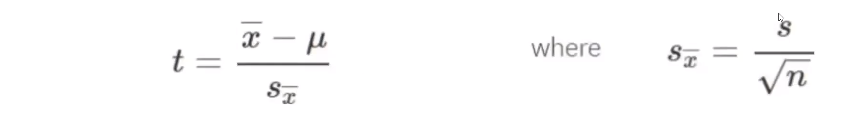

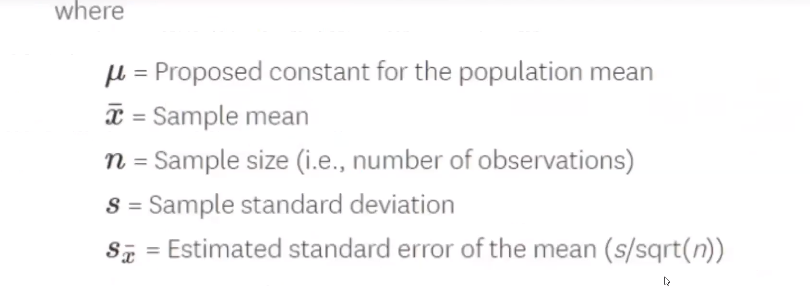

In [77]:
##population data

ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [78]:
len(ages)

32

In [80]:
##population mean
ages_mean = np.mean(ages)
print(ages_mean)

30.34375


**Null Hypothesis**<br>
Ho: mean = 30

**Alternate Hypothesis**<br>
H1: mean != 30

In [81]:
### Take a sample

sample_size = 10
age_sample = np.random.choice(ages,sample_size)

In [82]:
age_sample

array([18, 10, 30, 70, 43, 19, 28, 26, 35, 26])

In [83]:
### sample mean
np.mean(age_sample)

30.5

In [89]:
#### Apply T-test
### As we are using only 1 sample of data so using ttest_1samp
from scipy.stats import ttest_1samp
ttest,p_value = ttest_1samp(age_sample,30) ##here 30 is population mean

In [90]:
p_value

0.9263879063085854

In [91]:
###for 95% Confidence interval
if p_value < 0.05:  ### alpha value is 0.05 or 5%
    print("We are rejecting Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis or we are accepting Null Hypothesis")

We fail to reject Null Hypothesis or we are accepting Null Hypothesis


In [92]:
# for 85% CI
if p_value < 0.15:  ### alpha value is 0.15 or 15%
    print("We are rejecting Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis or we are accepting Null Hypothesis")

We fail to reject Null Hypothesis or we are accepting Null Hypothesis


### Some More Examples

Consider ther age of students in a school and ClassA

In [101]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)

## creating data for school using poisson distribution
# loc = standard deviation
# mu = mean
# size = size of the data or datapoints
school_ages = stats.poisson.rvs(loc=18,mu=35,size=1500) ### population data

## creating data for class using poisson distribution
class_ages = stats.poisson.rvs(loc=18,mu=30,size=25) ### sample data

In [102]:
### population mean
np.mean(school_ages)

53.303333333333335

In [103]:
##sample mean
## or we can use np.mean(class_ages)
class_ages.mean()

48.2

**Null Hypothesis**<br>
Ho: mean = 53

**Alternate Hypothesis**<br>
H1: mean != 53

In [104]:
### apply T-test
### here we have only 1 sample i.e. class_ages so using ttest_1samp

_,p_value = stats.ttest_1samp(a=class_ages, popmean=school_ages.mean())

In [105]:
p_value

3.26936314797003e-05

In [106]:
if p_value < 0.05:
    print("We are rejecting Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We are rejecting Null Hypothesis


### Two-sample T-test 

The independent samples t-Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The independent Samples t Test is a parametric test. This test is also known as Independent t Test

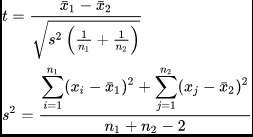

In [108]:
classA_ages = class_ages

In [110]:
### 1st sample
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47], dtype=int64)

In [116]:
np.mean(classA_ages)

48.2

In [112]:
### 2nd sample
np.random.seed(12)
classB_ages = stats.poisson.rvs(loc=18,mu=33,size=25)
classB_ages.mean()

49.92

In [113]:
_,p_value = stats.ttest_ind(a=classA_ages,b=classB_ages,equal_var=False)

In [114]:
p_value

0.2682065444757842

In [115]:
if p_value < 0.05:
    print("We are rejecting the null hypothesis.")
else:
    print("We fail to reject the null hypothesis or we are accepting null hypothesis.")

We fail to reject the null hypothesis or we are accepting null hypothesis.


### Paired T-test

The paired sample t-test, sometimes called the dependent sample t-test, is a statistical procedure used to determine whether the mean difference between two sets of observations is zero. In a paired sample t-test, each subject or entity is measured twice, resulting in pairs of observations. Common applications of the paired sample t-test include case-control studies or repeated-measures designs. Suppose you are interested in evaluating the effectiveness of a company training program. One approach you might consider would be to measure the performance of a sample of employees before and after completing the program, and analyze the differences using a paired sample t-test.

When you want to check how different samples from the same group are, you can go for a paired T-test

In [121]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [122]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[27.13903051 31.53030187 27.8635973  26.1050726  31.89605588 26.9187062
 19.70219174 27.22366006 31.31011079 31.78863882 18.31151834 38.10616996
 37.93231454 26.44302532 42.74318865]


In [123]:
weight_df = pd.DataFrame({"weight_10":np.array(weight1),
                          "weight_20":np.array(weight2),
                         "weight_change":np.array(weight2)-np.array(weight1)})

In [124]:
weight_df

,weight_10,weight_20,weight_change
0,25,27.139031,2.139031
1,30,31.530302,1.530302
2,28,27.863597,-0.136403
3,35,26.105073,-8.894927
4,28,31.896056,3.896056
5,34,26.918706,-7.081294
6,26,19.702192,-6.297808
7,29,27.223660,-1.776340
8,30,31.310111,1.310111
9,26,31.788639,5.788639


In [125]:
###Apply T-test
_,p_value = stats.ttest_rel(a=weight1,b=weight2)

In [126]:
print(p_value)

0.5795525374607515


In [127]:
if p_value < 0.05:
    print("We are rejecting null hypothesis")
else:
    print("We fail to reject null hypothesis")

We fail to reject null hypothesis


### Correlation

In [128]:
import seaborn as sns
df = sns.load_dataset('iris')

In [129]:
df.shape

(150, 5)

In [130]:
df.corr()

<ipython-input-130-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


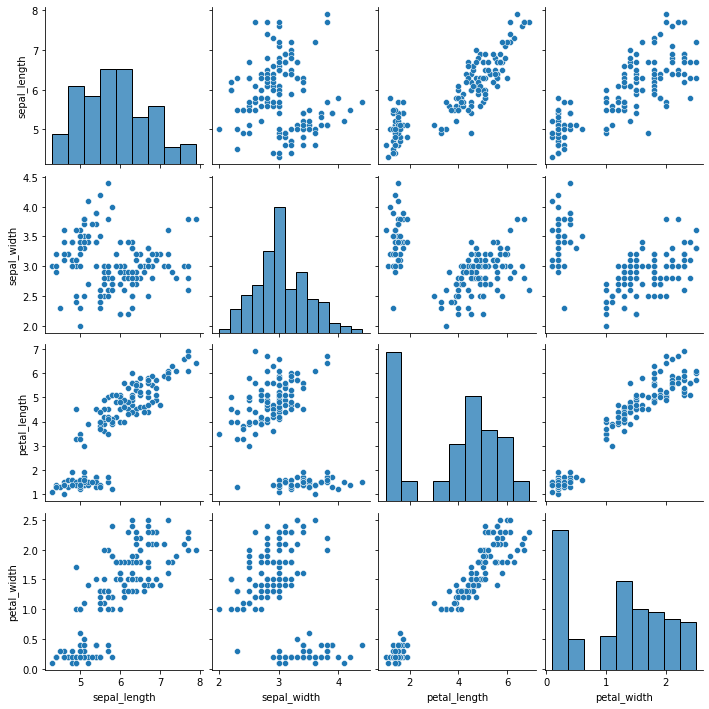

In [131]:
sns.pairplot(df)

### Anova Test(F-Test) <br>
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.

For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

### One Way F-test(Anova):-
It tell whether two or more groups are similar or not based on their mean similarity and f-score

Example:- there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not

In [132]:
import seaborn as sns
df1 = sns.load_dataset('iris')

In [133]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Null Hypothesis**<br>
H0: AverageMeanSepal(width)(setosa) = AverageMeanSepal(width)(versicolor) = AverageMeanSepal(width)(verginica)

**Alternate Hypothesis**<br>
H1: AverageMeanSepal(width)(setosa) != AverageMeanSepal(width)(versicolor) != AverageMeanSepal(width)(verginica)

In [135]:
### select petal width and species
df_anova = df1[['petal_width','species']]
df_anova.head()

,petal_width,species
0,0.2,setosa
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
4,0.2,setosa


In [136]:
## get unique species
grps = pd.unique(df_anova.species.values)

In [137]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [138]:
df_anova['petal_width'][df_anova.species == 'setosa']

0     0.2
1     0.2
2     0.2
3     0.2
4     0.2
5     0.4
6     0.3
7     0.2
8     0.2
9     0.1
10    0.2
11    0.2
12    0.1
13    0.1
14    0.2
15    0.4
16    0.4
17    0.3
18    0.3
19    0.3
20    0.2
21    0.4
22    0.2
23    0.5
24    0.2
25    0.2
26    0.4
27    0.2
28    0.2
29    0.2
30    0.2
31    0.4
32    0.1
33    0.2
34    0.2
35    0.2
36    0.2
37    0.1
38    0.2
39    0.2
40    0.3
41    0.3
42    0.2
43    0.6
44    0.4
45    0.3
46    0.2
47    0.2
48    0.2
49    0.2
Name: petal_width, dtype: float64

In [141]:
## dictionary comprihension 
## create dictioanry with petal with where key = specie name and values = value of petal width

d_data = {grp: df_anova['petal_width'][df_anova.species == grp] for grp in grps}

In [142]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [144]:
d_data['setosa']

0     0.2
1     0.2
2     0.2
3     0.2
4     0.2
5     0.4
6     0.3
7     0.2
8     0.2
9     0.1
10    0.2
11    0.2
12    0.1
13    0.1
14    0.2
15    0.4
16    0.4
17    0.3
18    0.3
19    0.3
20    0.2
21    0.4
22    0.2
23    0.5
24    0.2
25    0.2
26    0.4
27    0.2
28    0.2
29    0.2
30    0.2
31    0.4
32    0.1
33    0.2
34    0.2
35    0.2
36    0.2
37    0.1
38    0.2
39    0.2
40    0.3
41    0.3
42    0.2
43    0.6
44    0.4
45    0.3
46    0.2
47    0.2
48    0.2
49    0.2
Name: petal_width, dtype: float64

In [146]:
## Apply Anova test

F,p = stats.f_oneway(d_data['setosa'],d_data['versicolor'],d_data['virginica'])

In [147]:
print(p)

4.1694458394430593e-85


In [148]:
if p < 0.05:
    print("We are rejecting the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")

We are rejecting the Null Hypothesis


### Z-Test

In [150]:
# imports
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

# Generate a random array of 50 numbers having mean 110 and sd 15
# similar to the IQ scores data we assume above
mean_iq = 110
sd_iq = 15/math.sqrt(50)
alpha =0.05
null_mean =100
data = sd_iq*randn(50)+mean_iq

In [151]:
##print mean and sd
print("mean=%.2f stdv=%.2f" % (np.mean(data),np.std(data)))

mean=109.55 stdv=2.22


In [152]:
# now we perform the test. In this function, we passed data, in the value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger

ztest_Score, p_value = ztest(data,value = null_mean)
# the function outputs a p_value and z-score corresponding to that value, we compare the
# p-value with alpha, if it is greater than alpha then we do not null hypothesis
# else we reject it.


In [153]:
p_value

5.140756574079796e-199

In [154]:
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis
